## 資料前置處理

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu'))

In [9]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu'))

In [11]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation = 'relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation = 'softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## 進行訓練

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 61s - loss: 0.4895 - acc: 0.8476 - val_loss: 0.0973 - val_acc: 0.9719
Epoch 2/10
 - 59s - loss: 0.1419 - acc: 0.9581 - val_loss: 0.0641 - val_acc: 0.9803
Epoch 3/10
 - 64s - loss: 0.1030 - acc: 0.9689 - val_loss: 0.0514 - val_acc: 0.9842
Epoch 4/10
 - 59s - loss: 0.0840 - acc: 0.9750 - val_loss: 0.0461 - val_acc: 0.9854
Epoch 5/10
 - 62s - loss: 0.0720 - acc: 0.9780 - val_loss: 0.0395 - val_acc: 0.9883
Epoch 6/10
 - 65s - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0389 - val_acc: 0.9887
Epoch 7/10
 - 67s - loss: 0.0560 - acc: 0.9829 - val_loss: 0.0411 - val_acc: 0.9879
Epoch 8/10
 - 62s - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0337 - val_acc: 0.9902
Epoch 9/10
 - 59s - loss: 0.0449 - acc: 0.9868 - val_loss: 0.0347 - val_acc: 0.9896
Epoch 10/10
 - 54s - loss: 0.0421 - acc: 0.9874 - val_loss: 0.0319 - val_acc: 0.9908


In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,
                       train,
                       validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

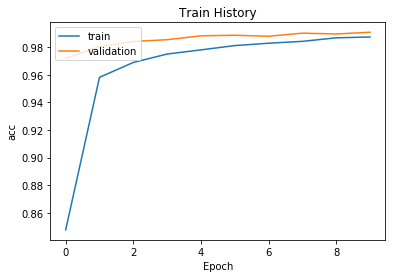

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

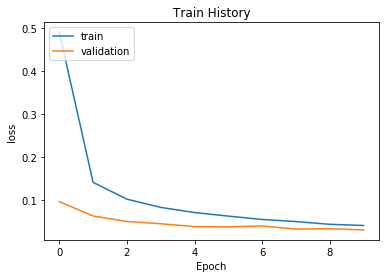

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

## 評估模型準確率

In [23]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 434us/step


0.9915

## 進行預測

In [24]:
prediction = model.predict_classes(x_Test4D_normalize)

In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [26]:
def plot_images_labels_prediction(images, 
                                  labels,
                                  prediction,
                                  idx,
                                  num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = f"label = {labels[idx]}"
        if len(prediction) > 0:
            title += f", predict = {prediction[idx]}"
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

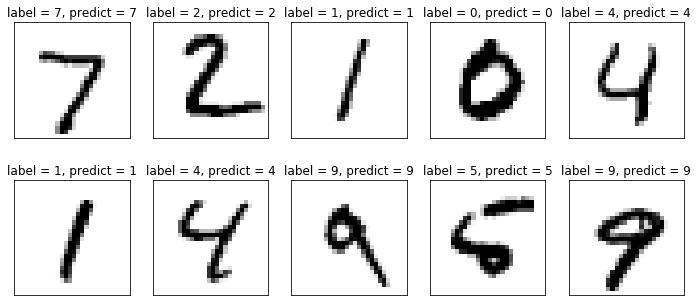

In [27]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)

## 顯示混淆矩陣

In [30]:
import pandas as pd
pd.crosstab(y_Test, 
            prediction,
            rownames = ['label'],
            colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,1,0,1,0,1,1,0
2,2,0,1027,0,0,0,0,2,1,0
3,0,0,0,1005,0,2,0,2,1,0
4,0,0,0,0,973,0,1,0,1,7
5,1,1,0,4,0,883,2,0,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,1,5,3,0,0,0,1016,1,2
8,2,0,3,2,1,1,0,2,958,5
